# Midterm 1 - Enron Data Analysis 2 - CEO Email Analysis

In [ ]:
# Analysis 2: Analysis over emails from CEO Lay K

In [5]:
import glob
import os
from os.path import basename
from email.parser import Parser
from collections import Counter

#We start with reading each file in the folder
files=glob.glob('~/midterm/data/enron/maildir/*') #files Gives a list of people who have sent emails

In [6]:
allheadersinemail=[]
for name in files:
    eName=basename(name)
    filesCategory=glob.glob(name+'/*')
    #print(filesCategory)
    if eName=='lay-k':
        for ceofiles in filesCategory:
            CEOFolder=glob.glob(ceofiles+'/*')
            for emailCategory in CEOFolder:
                    filesSent=glob.glob(emailCategory)
                    for eachEmail in filesSent:
                         with open(eachEmail) as data_file:
                            string_file=data_file.read()
                            email = Parser().parsestr(string_file)
                            allheadersinemail.append(email['Subject'])
                
Counter(sorted(allheadersinemail)).most_common(15)

[('Demand Ken Lay Donate Proceeds from Enron Stock Sales', 1124),
 ('', 145),
 ('ENE Friday Peer Group Report', 23),
 ('Thank You', 18),
 ('Re: Referendum Campaign', 15),
 ('New Kudlow Commentary', 14),
 ('Lilly Press Release', 12),
 ('Year End 2000 Performance Feedback', 12),
 ("Approval of Rosalee Fleming's Expense Report", 12),
 ('Re: TEST', 11),
 ("Re: Duchess of Northumbria's request", 11),
 ('Re: Succession Plan', 10),
 ('Re: this is a test message to Rosalie', 9),
 ('Panel on Valuation', 9),
 ('Transactions in Lilly Stock', 9)]

In [ ]:
# We can see that the content of one email is 1124 which is an urge for people to
#return back the money that CEO had taken by seling stocks before bankrupcy

In [8]:
emailbody = []
for name in files:
    eName=basename(name)
    filesCategory=glob.glob(name+'/*')
    #print(filesCategory)
    if eName=='lay-k':
        for ceofiles in filesCategory:
            CEOFolder=glob.glob(ceofiles+'/*')
            for emailCategory in CEOFolder:
                    filesSent=glob.glob(emailCategory)
                    for eachEmail in filesSent:
                         with open(eachEmail) as data_file:
                            string_file=data_file.read()
                            email = Parser().parsestr(string_file)
                            for part in email.walk():
                                if part.get_content_type() == 'text/plain':
                                    emailbody.append(part.get_payload() )
                                    ''.join(emailbody)

In [70]:
print(type(emailbody)) 

<class 'list'>


In [9]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.update('the','I','that','would')
emailbodyWithoutPunction = [i for i in emailbody if i not in stop]
#print(sorted(stop))

emailtext = ''.join(emailbodyWithoutPunction)

In [10]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
from PIL import ImageFont, ImageDraw
from wordcloud import WordCloud, STOPWORDS

In [11]:
print(sorted(stop))

['I', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'e', 'each', 'few', 'for', 'from', 'further', 'h', 'had', 'hadn', 'has', 'hasn', 'have', 'haven', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', 'it', 'its', 'itself', 'just', 'l', 'll', 'm', 'ma', 'me', 'mightn', 'more', 'most', 'mustn', 'my', 'myself', 'needn', 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', 'she', 'should', 'shouldn', 'so', 'some', 'such', 't', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'u', '

In [12]:
print(type(stop))

<class 'set'>


In [30]:
new_stop=set(stop)
new_stop.add('enron')
new_stop.add('com')
new_stop.add('employee')
new_stop.add('http')
new_stop.add('New')
new_stop.add('employees')
new_stop.add('energy')
new_stop.add('New')


In [32]:
new_stop

{'I',
 'New',
 'Please',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'com',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'e',
 'each',
 'employee',
 'employees',
 'energy',
 'enron',
 'few',
 'for',
 'from',
 'further',
 'h',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'http',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'l',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 's

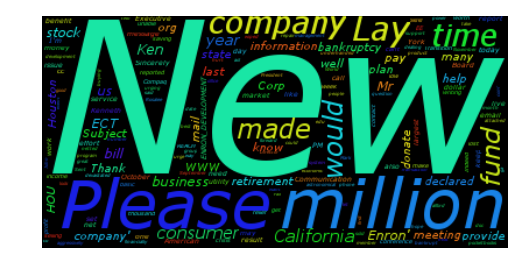

In [31]:
font = ImageFont.truetype("arial.ttf", 15)

wordcloud = WordCloud(font_path='C:\\Users\\Jay Padhya\\Documents\\A_Midterm\\verdanai.ttf',
                      relative_scaling = 1.0,
                      stopwords = new_stop 
                      ).generate(emailtext)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# WE ITERATED OVER THE CEO's HEADERS to know what the most common subject was and the most common words in the email body. The most common subject was a demand from many users to return back the cash from scandal and the most common words in email body included Enron, million,bankrupcy